In [2]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import scipy

In [3]:
# Reading the dataset
data = pd.read_csv('creditcard.csv',sep=',')
#data.head(100)

In [4]:
data.shape
total_size = data.shape[0]

In [5]:
#data.info()

Text(0.5, 1.0, 'Transactions Class Distribution')

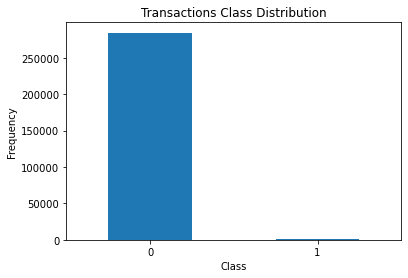

In [6]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.ylabel("Frequency")

plt.xlabel("Class")

plt.title("Transactions Class Distribution")


In [7]:
normal = data[data['Class'] == 0]

fraud = data[data['Class'] == 1]
total_fraud = fraud.shape[0]
#fraud.head(-1)

In [8]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [9]:
#fraud.Amount.describe()


In [10]:
#normal.Amount.describe()

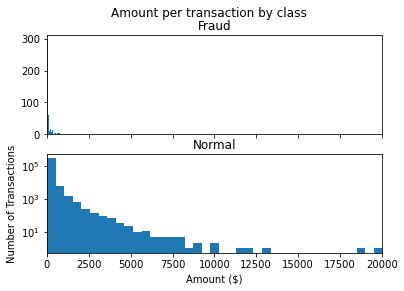

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

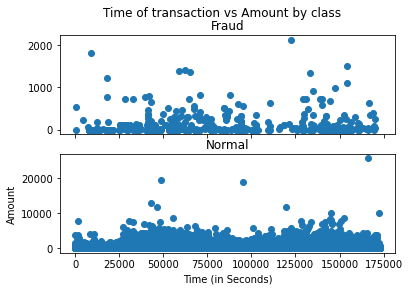

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show;

In [13]:
# Standardization method
from sklearn.preprocessing import StandardScaler
# Instantiate the Scaler
scaler = StandardScaler()
# Fit the data into scaler and transform
data['Amount'] = scaler.fit_transform(data[['Amount']])
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [14]:
from sklearn.model_selection import train_test_split
X = data.drop(['Class'], axis=1)
# Putting target variable to y
Y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)
#X.head()

In [15]:
from sklearn.linear_model import LogisticRegression
# Importing libraries for cross validation
from sklearn.model_selection import cross_val_score

In [16]:
logistic_imb = LogisticRegression(C=0.1,max_iter=1000)
logistic_imb_model = logistic_imb.fit(X_train, y_train)

In [17]:
y_train_pred = logistic_imb_model.predict(X_train)

In [18]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227417     34]
 [   148    246]]


In [19]:
TN = confusion[0,0] # true negatives
TP = confusion[1,1] # true positive 
FN = confusion[1,0] # false negatives
FP = confusion[0,1] # false positives


In [20]:
FN
# we are supposed to minimize false negatives since we don't want any fradulant transection to go through.
# we also need to mimimize the false paositives but this is low risk.
train_FN = FN
train_FP = FP
print(train_FN)

148


In [21]:
# Accuracy
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
print("Accuracy: ",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity: ",TP / float(TP+FN))

# Specificity
print("Specificity: ", TN / float(TN+FP))

# F1 score
print("F1-Score: ", f1_score(y_train, y_train_pred))

# total missed faulty 


Accuracy:  0.9992012113498212
Sensitivity:  0.6243654822335025
Specificity:  0.9998505172542658
F1-Score:  0.7299703264094956


In [22]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)
# Confusion matrix
confusion1 = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion1)


[[56854    10]
 [   48    50]]


In [23]:
TP1 = confusion1[1,1] # true positive 
TN1 = confusion1[0,0] # true negatives
FP1 = confusion1[0,1] # false positives
FN1 = confusion1[1,0] # false negatives
# Accuracy
print("Accuracy: ",metrics.accuracy_score(y_test, y_test_pred))

# Specificity
print("Specificity: ", TN1 / float(TN1+FP1))

# Sensitivity
print("Sensitivity: ",TP1 / float(TP1+FN1))


# F1 score
print("F1-Score: ", f1_score(y_test, y_test_pred))

Accuracy:  0.9989817773252344
Specificity:  0.9998241418120428
Sensitivity:  0.5102040816326531
F1-Score:  0.6329113924050633


In [24]:
# classification_report
print(classification_report(y_test, y_test_pred))
print(FN)
print("Missed_frauds: ", FN1 + train_FN);

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.51      0.63        98

    accuracy                           1.00     56962
   macro avg       0.92      0.76      0.82     56962
weighted avg       1.00      1.00      1.00     56962

148
Missed_frauds:  196


In [25]:
from xgboost import XGBClassifier
params = {'learning_rate': .2,
          'n_estimators':50,
          'max_depth': 2, 
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

C:\Users\kdhar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:33:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 50,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [26]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)


In [27]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)


[[227451      0]
 [     0    394]]


In [28]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [29]:
# Accuracy
print("Accuracy: ",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity: ",TP / float(TP+FN))

# Specificity
print("Specificity: ", TN / float(TN+FP))

# F1 score
print("F1-Score: ", f1_score(y_train, y_train_pred))

Accuracy:  1.0
Sensitivity:  1.0
Specificity:  1.0
F1-Score:  1.0


In [30]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

In [31]:
# Confusion matrix
confusion1 = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion1)

[[56863     1]
 [   20    78]]


In [32]:
TP1 = confusion1[1,1] # true positive 
TN1 = confusion1[0,0] # true negatives
FP1 = confusion1[0,1] # false positives
FN1 = confusion1[1,0] # false negatives

In [33]:
# Accuracy
print("Accuracy: ",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity: ",TP1 / float(TP1+FN1))

# Specificity
print("Specificity: ", TN1 / float(TN1+FP1))

# F1 score
print("F1-Score: ", f1_score(y_test, y_test_pred))

print("Missed_frauds: ", FN + FN1)

print(classification_report(y_test, y_test_pred))

Accuracy:  0.9996313331694814
Sensitivity:  0.7959183673469388
Specificity:  0.9999824141812043
F1-Score:  0.8813559322033897
Missed_frauds:  20
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [34]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_imb_model = DecisionTreeClassifier( 
                                  random_state = 42,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=42)

In [35]:
y_train_pred = dt_imb_model.predict(X_train)

In [36]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))


[[227372     79]
 [   126    268]]
Accuracy:- 0.999100265531392
Sensitivity:- 0.6802030456852792
Specificity:- 0.9996526724437351
F1-Score:- 0.7233468286099864


In [37]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)
# Confusion matrix
confusion1 = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion1)
TP1 = confusion1[1,1] # true positive 
TN1 = confusion1[0,0] # true negatives
FP1 = confusion1[0,1] # false positives
FN1 = confusion1[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP1 / float(TP1+FN1))

# Specificity
print("Specificity:-", TN1 / float(TN1+FP1))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))


print("Missed_frauds: ", FN + FN1)

print(classification_report(y_test, y_test_pred))

[[56839    25]
 [   29    69]]
Accuracy:- 0.9990519995786665
Sensitivity:- 0.7040816326530612
Specificity:- 0.9995603545301069
F1-Score:- 0.7233468286099864
Missed_frauds:  155
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.70      0.72        98

    accuracy                           1.00     56962
   macro avg       0.87      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [38]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10)

In [40]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

In [41]:
y_train_pred = rfc_imb_model.predict(X_train)
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

[[227403     48]
 [   108    286]]
Accuracy:- 0.9993153240141324
Sensitivity:- 0.7258883248730964
Specificity:- 0.9997889655354341
F1-Score:- 0.7857142857142856


In [42]:
y_test_pred = rfc_imb_model.predict(X_test)
# Confusion matrix
confusion1 = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion1)
TP1 = confusion1[1,1] # true positive 
TN1 = confusion1[0,0] # true negatives
FP1 = confusion1[0,1] # false positives
FN1 = confusion1[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP1 / float(TP1+FN1))

# Specificity
print("Specificity:-", TN1 / float(TN1+FP1))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

print("Missed_frauds: ", FN + FN1)

[[56853    11]
 [   31    67]]
Accuracy:- 0.9992626663389628
Sensitivity:- 0.6836734693877551
Specificity:- 0.9998065559932471
F1-Score:- 0.7857142857142856
Missed_frauds:  139


In [43]:
outlier_fraction = fraud.shape[0]/normal.shape[0]
print(outlier_fraction)

0.0017304750013189597


In [44]:
from sklearn.ensemble import IsolationForest
if_model = IsolationForest(n_estimators=100, max_samples=len(X_train), 
                                       contamination=outlier_fraction,random_state=42, verbose=0)
if_model.fit(X_train)
scores_prediction = if_model.decision_function(X_train)
y_pred = if_model.predict(X_train)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != y_train).sum()
print("Classification Report :")
print(metrics.classification_report(y_train,y_pred))

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.32      0.32      0.32       394

    accuracy                           1.00    227845
   macro avg       0.66      0.66      0.66    227845
weighted avg       1.00      1.00      1.00    227845



In [45]:
confusion = metrics.confusion_matrix(y_train, y_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_pred))

[[227183    268]
 [   267    127]]
Accuracy:- 0.9976519124843644
Sensitivity:- 0.3223350253807107
Specificity:- 0.9988217242395065
F1-Score:- 0.3219264892268695


In [46]:
y_test_pred = if_model.predict(X_test)
y_test_pred[y_test_pred == 1] = 0
y_test_pred[y_test_pred == -1] = 1
n_errors = (y_pred != y_train).sum()
# Run Classification Metrics

confusion1 = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion1)
TP1 = confusion1[1,1] # true positive 
TN1 = confusion1[0,0] # true negatives
FP1 = confusion1[0,1] # false positives
FN1 = confusion1[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP1 / float(TP1+FN1))

# Specificity
print("Specificity:-", TN1 / float(TN1+FP1))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

print("Missed_frauds: ", FN + FN1)

print(classification_report(y_test, y_test_pred))

[[56806    58]
 [   64    34]]
Accuracy:- 0.9978582212703205
Sensitivity:- 0.3469387755102041
Specificity:- 0.9989800225098481
F1-Score:- 0.3578947368421052
Missed_frauds:  331
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.37      0.35      0.36        98

    accuracy                           1.00     56962
   macro avg       0.68      0.67      0.68     56962
weighted avg       1.00      1.00      1.00     56962



In [48]:
x = [1, 2, 3, 4, 5]
#X = [Logistic_Regression, XGBClassifier, Decision_tree, random_forest, IsolationFore

In [53]:
from sklearn.neighbors import LocalOutlierFactor
lof_model = LocalOutlierFactor(n_neighbors=20,novelty=True, algorithm='auto', 
                                              leaf_size=30,
                                              p=2, metric_params=None, contamination=outlier_fraction)
lof_model.fit(X_train)
scores_prediction = lof_model.negative_outlier_factor_
y_train_pred = lof_model.predict(X_train)
y_train_pred[y_train_pred == 1] = 0
y_train_pred[y_train_pred == -1] = 1
n_errors = (y_train_pred != y_train).sum()

In [54]:
print(metrics.classification_report(y_train,y_train_pred))
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.10      0.09      0.10       394

    accuracy                           1.00    227845
   macro avg       0.55      0.55      0.55    227845
weighted avg       1.00      1.00      1.00    227845

[[227135    316]
 [   357     37]]
Accuracy:- 0.9970462375737892
Sensitivity:- 0.09390862944162437
Specificity:- 0.9986106897749405
F1-Score:- 0.09906291834002677


In [55]:
y_test_pred = lof_model.predict(X_test)
y_test_pred[y_test_pred == 1] = 0
y_test_pred[y_test_pred == -1] = 1
n_errors = (y_pred != y_train).sum()
# Run Classification Metrics

confusion1 = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion1)
TP1 = confusion1[1,1] # true positive 
TN1 = confusion1[0,0] # true negatives
FP1 = confusion1[0,1] # false positives
FN1 = confusion1[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP1 / float(TP1+FN1))

# Specificity
print("Specificity:-", TN1 / float(TN1+FP1))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

print("Missed_frauds: ", FN + FN1)

print(classification_report(y_test, y_test_pred))

[[56779    85]
 [   85    13]]
Accuracy:- 0.9970155542291352
Sensitivity:- 0.1326530612244898
Specificity:- 0.9985052054023635
F1-Score:- 0.1326530612244898
Missed_frauds:  442
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.13      0.13      0.13        98

    accuracy                           1.00     56962
   macro avg       0.57      0.57      0.57     56962
weighted avg       1.00      1.00      1.00     56962



Text(0.5, 1.0, 'Model vs the training true posititives')

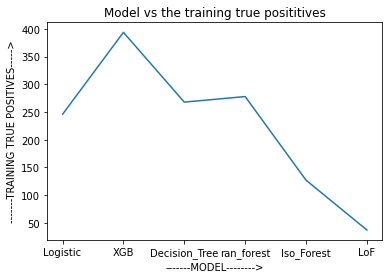

In [64]:
x = [1, 2, 3, 4, 5]
#X = [Logistic_Regression, XGBClassifier, Decision_tree, random_forest, IsolationForest]
# Y-axis values
TP1 = [246,394, 268, 278 ,127,37]
FN1 = [148,0, 126, 116, 267,357]
FP1 = [34,0, 79, 46, 268,316]
SENSITIVITY1 = [.624,1.0 , .680, .705, .322, 0.093]
F1_score1 = [0.729,1, .723, .774, .321, .099]


#x = [1, 2, 3, 4, 5]
names = ["Logistic", "XGB", "Decision_Tree", "ran_forest", "Iso_Forest","LoF"]
# Y-axis values
TP2 = [50,78,69,65,34,13]
FN2 = [48,20, 29, 33,64,85]
FP2 = [10,1,25, 11,58,85]
SENSITIVITY2 = [.510, .795 , .704, .663, .346,.132]
F1_score2 = [0.632, .881, 0.723, .774, .357,.132]
Missed_frauds2 = [196, 20,155, 149,331,442]
# Function to plot
plt.plot(names,TP1)
plt.xlabel("-------MODEL-------->")
plt.ylabel("-------TRAINING TRUE POSITIVES----->")
plt.title("Model vs the training true posititives")


Text(0.5, 1.0, 'Model vs the testing true posititives')

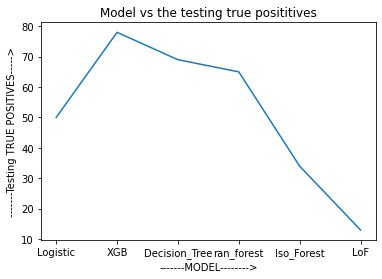

In [65]:
plt.plot(names,TP2)
plt.xlabel("-------MODEL-------->")
plt.ylabel("-------Testing TRUE POSITIVES----->")
plt.title("Model vs the testing true posititives")

Text(0.5, 1.0, 'total number of missed frauds by models')

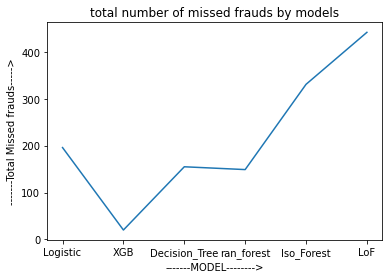

In [66]:
plt.plot(names,Missed_frauds2)
plt.xlabel("-------MODEL-------->")
plt.ylabel("-------Total Missed frauds----->")
plt.title("total number of missed frauds by models")

Text(0.5, 1.0, 'Model vs recall of training data')

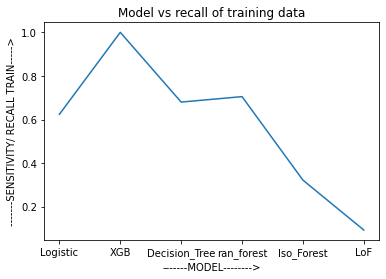

In [67]:
plt.plot(names,SENSITIVITY1)
plt.xlabel("-------MODEL-------->")
plt.ylabel("-------SENSITIVITY/ RECALL TRAIN----->")
plt.title("Model vs recall of training data")

Text(0.5, 1.0, 'Model vs recall of testing data')

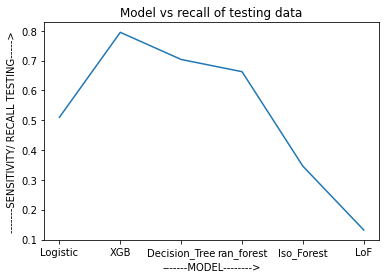

In [68]:
plt.plot(names,SENSITIVITY2)
plt.xlabel("-------MODEL-------->")
plt.ylabel("-------SENSITIVITY/ RECALL TESTING----->")
plt.title("Model vs recall of testing data")

Text(0.5, 1.0, 'Model vs F1 SCORE WHILE TRAINING ')

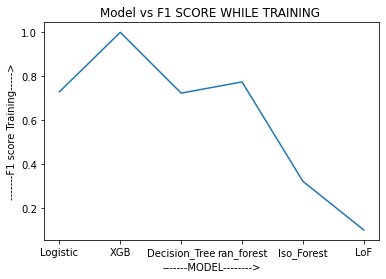

In [69]:
plt.plot(names,F1_score1)
plt.xlabel("-------MODEL-------->")
plt.ylabel("-------F1 score Training----->")
plt.title("Model vs F1 SCORE WHILE TRAINING ")

Text(0.5, 1.0, 'Model vs F1 SCORE WHILE TESTING ')

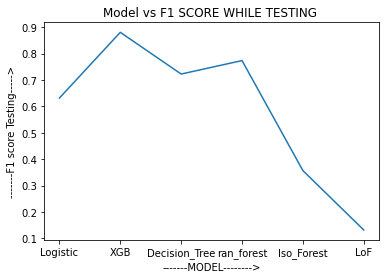

In [70]:
plt.plot(names,F1_score2)
plt.xlabel("-------MODEL-------->")
plt.ylabel("-------F1 score Testing----->")
plt.title("Model vs F1 SCORE WHILE TESTING ")